# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Fountain Partners\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


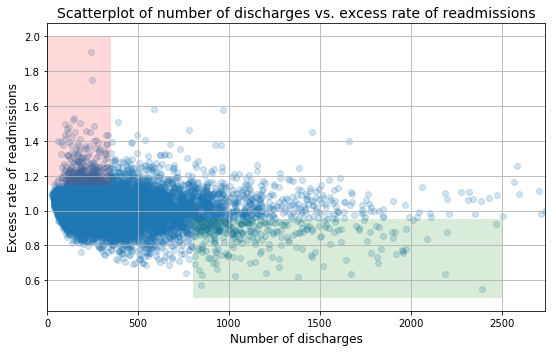

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
import seaborn as sns

# Exercise A

In [6]:
# scatter plot with excess readmission ratio and number of readmissions
excess_readm_ratio = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
num_readm = clean_hospital_read_df['Number of Readmissions'][81:-3]
num_disch = clean_hospital_read_df['Number of Discharges'][81:-3]

In [7]:
clean_hospital_read_df.tail()

Hospital Name  Provider Number State  \
8126      NAPLES COMMUNITY HOSPITAL           100018    FL   
6643       COMMUNITY MEDICAL CENTER           310041    NJ   
1892               FLORIDA HOSPITAL           100007    FL   
13615  NEW ENGLAND BAPTIST HOSPITAL           220088    MA   
13666  HOSPITAL FOR SPECIAL SURGERY           330270    NY   

                 Measure Name  Number of Discharges  Footnote  \
8126   READM-30-HIP-KNEE-HRRP                  2716       NaN   
6643       READM-30-COPD-HRRP                  2740       NaN   
1892         READM-30-HF-HRRP                  3570       NaN   
13615  READM-30-HIP-KNEE-HRRP                  3980       NaN   
13666  READM-30-HIP-KNEE-HRRP                  6793       NaN   

       Excess Readmission Ratio  Predicted Readmission Rate  \
8126                     0.9804                         5.2   
6643                     1.0003                        22.7   
1892                     1.0896                        24.5   
13615                    0.7682                         3.7   
13666                    0.7379                         3.9   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
8126                         5.3                   141.0  07/01/2010   
6643                        22.7                   623.0  07/01/2010   
1892                        22.5                   879.0  07/01/2010   
13615                        4.8                   142.0  07/01/2010   
13666                        5.3                   258.0  07/01/2010   

         End Date  
8126   06/30/2013  
6643   06/30/2013  
1892   06/30/2013  
13615  06/30/2013  
13666  06/30/2013

In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
# pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for rate of readm and number discharges : r
r = pearson_r(x, y)

# Print the result
print(r)


-0.0930955428759


Negative Pearson correlation  coefficient means that the excess readmission rate is negatively correlated with number of discharges

slope = -2.85650529438e-05
intercept = 1.01794755795


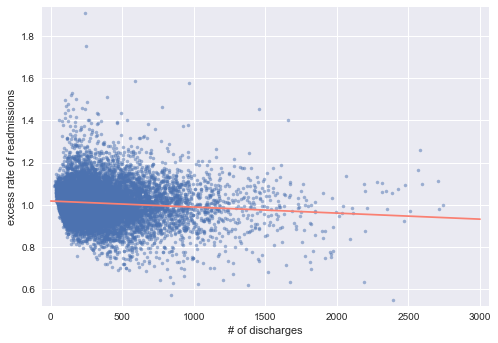

In [10]:
# Plot the readmission rate versus number of discharges
_ = plt.plot(x, y, marker='.', linestyle='none', alpha=0.5)
plt.margins(0.02)
_ = plt.xlabel('# of discharges')
_ = plt.ylabel('excess rate of readmissions')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x_1 = np.array([0,3000])
y_1 = a * x_1 + b

# Add regression line to your plot
_ = plt.plot(x_1, y_1, color='salmon')

# Draw the plot
plt.show()

**A. Initial observations based on the plot above**

Answer: Based on the negative Pearson correlation coefficient and downward sloping regression, I do agree with above analysis.

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [26]:
# testing the first statement
# finding the mean
np.mean(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 100])

1.0226183501683506

In [24]:
# count of hospitals w excess readmission rate greater than 1
count_1 = len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 100][clean_hospital_read_df['Excess Readmission Ratio']>1])

In [25]:
# confirming the % 
count_1 / len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 100])

0.5918045705279747

First statement is incorrect:
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 **but** approx. **59%** have excess readmission rate greater than 1

In [27]:
# testing the second statement
# finding the mean
np.mean(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] > 1000])

0.9783354211663071

In [28]:
# count of hospitals w excess readmission rate greater than 1
count_2 = len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] > 1000][clean_hospital_read_df['Excess Readmission Ratio']>1])

In [29]:
# confirming the % 
count_2 / len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] > 1000])

0.4449244060475162

Second statement is correct:
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

*I would generally agree with the first statement above. I'm not sure if the second statement is accurate because there is no evidence supporting the statement.*

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [34]:
# testing the first statement
# finding the mean of readmission rate for with small capacity (<300)
np.mean(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 300])

1.0142382121807445

In [35]:
# count of hospitals w excess readmission rate greater than 1
count_3 = len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 300][clean_hospital_read_df['Excess Readmission Ratio']>1])

In [37]:
# finding % of hospitals w readmission rate greater 1
count_3 / len(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 300])

0.5304572628857651

*Based on our finding above, I would generally with the first recommendation.*

*Although the evidence suggests that larger hospitals do have a lower excess readmission rate, I'm not sure if the second recommendation is feasible for hospitals in rural sparsely populated areas.*

# Exercise B

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

In [11]:
np.mean(excess_readm_ratio)

1.007540917000168

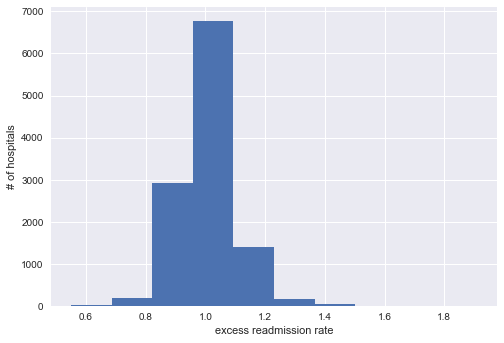

In [14]:
#plot histogram of the excess readmission rate
plt.hist(y)
plt.ylabel('# of hospitals')
plt.xlabel('excess readmission rate')

1. Null hypothesis: let's assume that the excess readmission means of small hospitals (<300 discharges) are in fact equal to the sample mean. This is to check if the readmission rate for small hospitals are indeed that high and not by accident.
2. To find p-value I will conduct a one-sample bootstrap hypothesis test below.

In [43]:
# sample mean
sample_mean = np.mean(excess_readm_ratio)
sample_mean

1.007540917000168

In [62]:
# setting a variable for excess readmission rates of small hospitals (<300 discharges)
small_hospitals = clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges'] < 300]

In [47]:
# small hospitals excess readmission rate mean
small_hospitals_mean = np.mean(small_hospitals)
small_hospitals_mean

1.0142382121807445

In [63]:
# Make an array of translated small hospital readmission rates: translated_small_hospitals
translated_small_hospitals = small_hospitals - small_hospitals_mean + sample_mean
np.mean(translated_small_hospitals)

1.0075409170001708

In [75]:
# Take 10,000 bootstrap replicates of small hospital translated readmission rates : bs_replicates
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(translated_small_hospitals))

In [80]:
# Compute fraction of replicates that are less than the observed readmission rates: p
p = np.sum(bs_replicates <= small_hospitals_mean) / 10000

# Print the p-value
print('p = ', p)

p =  0.5675


C:\Users\Fountain Partners\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


*3. We have p-value over 0.01 which means we fail to reject the null hypothesis

*4. Statistical significance and practical significance do seem to differ here. My recommendation to the client now might suggest that small hospitals' (<300 discharges) higher readmission rate might be caused by chance because our p-value is not statistically significant.

*5. Above scatter plot is great for demonstrating correllation between hospital discharges and the excess readmission rate. The disadvantage is that harder to notice that rate of readmissions is trending down with increasing number of discharges.

- Construct another plot that conveys the same information in a more direct manner.

slope = -2.85650529438e-05
intercept = 1.01794755795


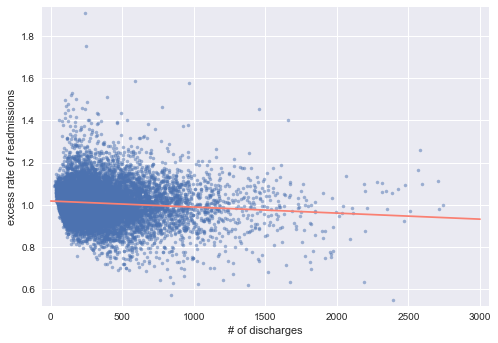

In [103]:
# Plot the readmission rate versus number of discharges
_ = plt.plot(x, y, marker='.', linestyle='none', alpha=0.5)
plt.margins(0.02)
_ = plt.xlabel('# of discharges')
_ = plt.ylabel('excess rate of readmissions')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x_1 = np.array([0,3000])
y_1 = a * x_1 + b

# Add regression line to your plot
_ = plt.plot(x_1, y_1, color='salmon')

# Draw the plot
plt.show()